Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  obj

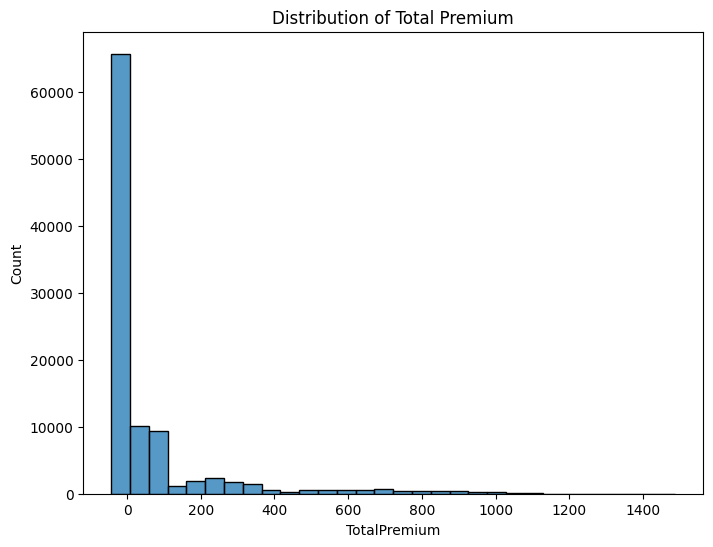

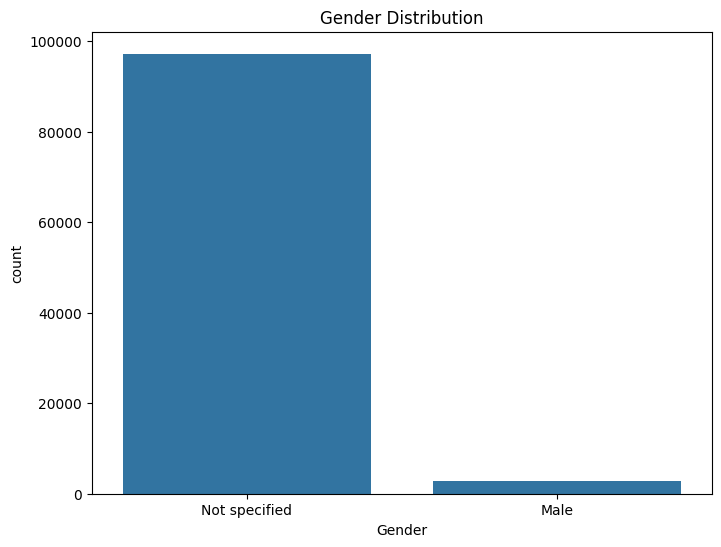

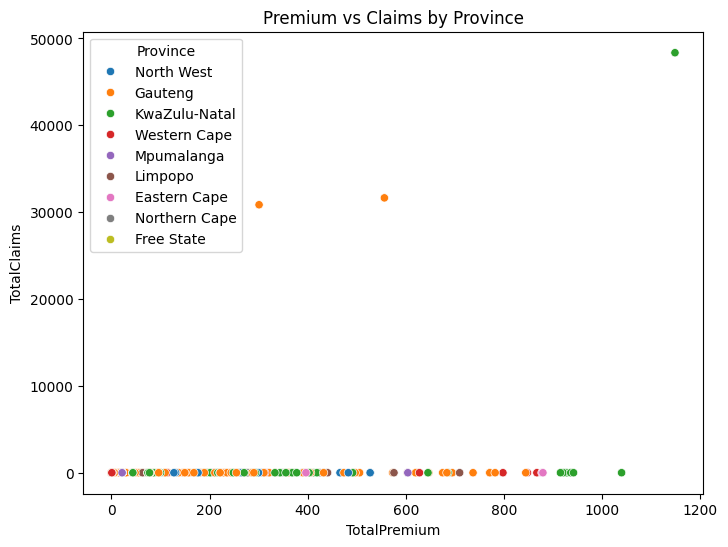

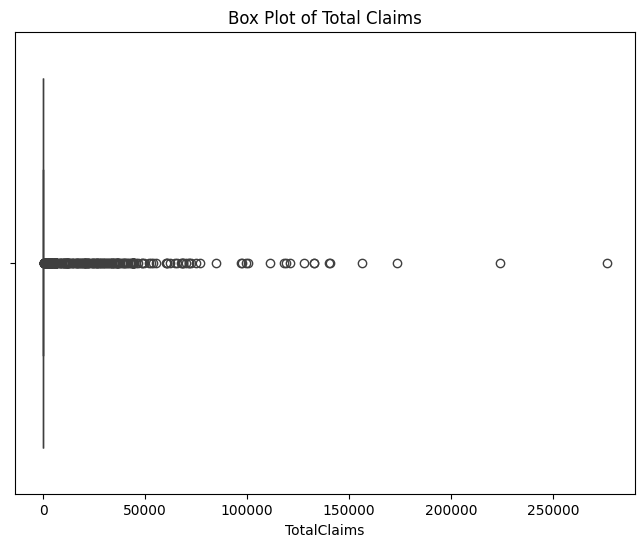

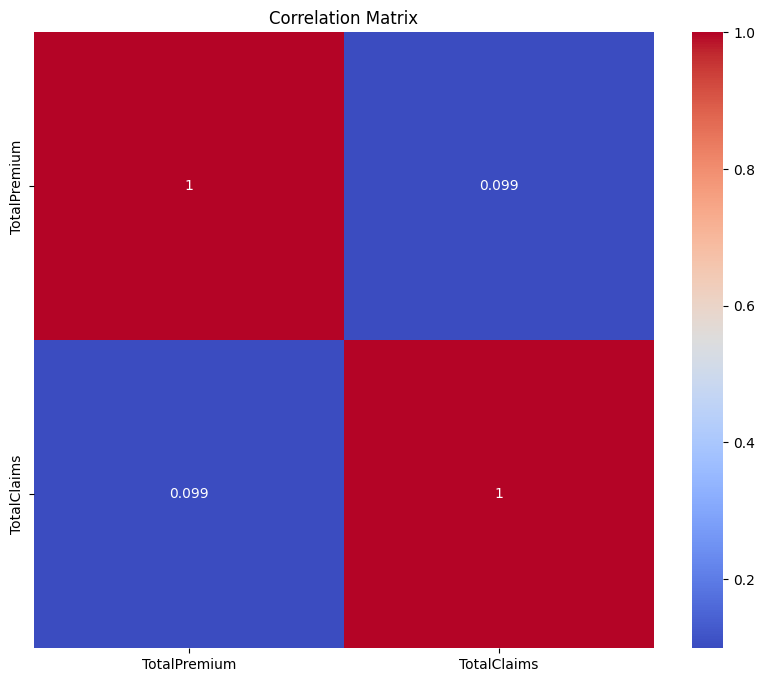

Rebuilt unique:
 ['Unknown' 'No' 'Yes']
WrittenOff unique:
 ['Unknown' 'No' 'Yes']
CrossBorder unique:
 ['Unknown']
Gender values:
 Gender
Not specified    97252
Male              2748
Name: count, dtype: int64


In [1]:
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('../figures', exist_ok=True)

# Cell 2: Load data with Pandas
df = pd.read_csv('../insurance_data.txt', sep='|', nrows=100000)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['Province'] = df['Province'].astype('str')
df['Rebuilt'] = df['Rebuilt'].fillna('Unknown').astype('str')
df['WrittenOff'] = df['WrittenOff'].fillna('Unknown').astype('str')
df['CrossBorder'] = df['CrossBorder'].fillna('Unknown').astype('str')
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df[['TotalPremium', 'TotalClaims']].describe())

# Cell 3: Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, float('nan')).fillna(0)
print("Overall Loss Ratio:", df['LossRatio'].mean())
province_loss_ratio = df.groupby('Province')['LossRatio'].mean()
print("Province Loss Ratio:\n", province_loss_ratio)

# Cell 4: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPremium'].dropna(), bins=30)
plt.title('Distribution of Total Premium')
plt.savefig('../figures/total_premium_histogram.png')
plt.show()

# Cell 5: Gender Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.savefig('../figures/gender_distribution.png')
plt.show()

# Cell 6: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df.sample(frac=0.01))
plt.title('Premium vs Claims by Province')
plt.savefig('../figures/premium_vs_claims.png')
plt.show()

# Cell 7: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalClaims'].dropna())
plt.title('Box Plot of Total Claims')
plt.savefig('../figures/claims_boxplot.png')
plt.show()

# Cell 8: Correlation Matrix
corr = df[['TotalPremium', 'TotalClaims']].corr()  # Removed SumInsured to avoid potential errors
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png')
plt.show()

# Cell 9: Verify Rebuilt, WrittenOff, CrossBorder, Gender
print("Rebuilt unique:\n", df['Rebuilt'].unique())
print("WrittenOff unique:\n", df['WrittenOff'].unique())
print("CrossBorder unique:\n", df['CrossBorder'].unique())
print("Gender values:\n", df['Gender'].value_counts())